# Task 03: Linear Regression with Multiple Variables

## Import libraries

In [2]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: 
Read the data files using pandas.


In [3]:
# read data into data frame 
df = pd.read_csv('task02.csv')

# drop the serial coloumn 
df = df.drop(['Unnamed: 0'], axis =1)
print(df.head())

# normalize the data 
df_normalized=(df-df.mean())/df.std()

# remove outliers
print('shape of data before removing outliers:',df_normalized.shape)
data_normalized = df_normalized[(df_normalized.abs()<3).all(axis=1)].copy()
data_unnormalized = df[(df_normalized.abs()<3).all(axis=1)].copy()
print('shape of data after removing outliers:',data_normalized.shape)

# Split data into train, val and test
def train_val_test_split(data,train_per, val_per):
    samples = len(data)
    train_samples = math.ceil(samples*train_per)
    val_samples = math.ceil(samples*val_per)
    indices = np.random.permutation(data.shape[0])
    train_idx, val_idx, test_idx = indices[:train_samples], indices[train_samples:train_samples+val_samples] , indices[train_samples+val_samples:]
    train, val, test = data.iloc[train_idx], data.iloc[val_idx], data.iloc[test_idx]
    return train, val, test

train_normalized, val_normalized ,test_normalized = train_val_test_split(data_normalized,0.7,0.15)
train_unnormalized, val_unnormalized ,test_unnormalized = train_val_test_split(data_unnormalized,0.7,0.15)

print('shape of train data:', train_normalized.shape)
print('shape of validation data:', val_normalized.shape)
print('shape test data:', test_normalized.shape)

# seperte features and labels. Also append coloumns of 1 in the begining 
#for normlized data
train_normalized_x , train_normalized_y =np.c_[np.ones(len(train_normalized)),train_normalized.iloc[:,:-1]],train_normalized.iloc[:,-1:]
val_normalized_x , val_normalized_y = np.c_[np.ones(len(val_normalized)),val_normalized.iloc[:,:-1]],val_normalized.iloc[:,-1:]
test_normalized_x , test_normalized_y = np.c_[np.ones(len(test_normalized)),test_normalized.iloc[:,:-1]],test_normalized.iloc[:,-1:]
# for unormalized data
train_unnormalized_x , train_unnormalized_y = np.c_[np.ones(len(train_normalized)),train_unnormalized.iloc[:,:-1]],train_unnormalized.iloc[:,-1:]
val_unnormalized_x , val_unnormalized_y = np.c_[np.ones(len(val_unnormalized)),val_unnormalized.iloc[:,:-1]],val_unnormalized.iloc[:,-1:]
test_unnormalized_x , test_unnormalized_y = np.c_[np.ones(len(test_unnormalized)),test_unnormalized.iloc[:,:-1]],test_unnormalized.iloc[:,-1:]

   Area(sq_ft)  Bedrooms  Kitchen  YearBuilt   Price
0         8450         3        1       2003  208500
1         9600         3        1       1976  181500
2        11250         3        1       2001  223500
3         9550         3        1       1915  140000
4        14260         4        1       2000  250000
shape of data before removing outliers: (1460, 5)
shape of data after removing outliers: (1348, 5)
shape of train data: (944, 5)
shape of validation data: (203, 5)
shape test data: (201, 5)


## Step 2: 
Randomly initialize the m and c. Set the learning rate to 0.001 and set the number of epochs to 100

In [4]:
parameters = np.array([np.random.rand() for i in range(5)]).reshape(5,1)# consider first variabel as c
learning_rate = 0.001
epochs = 100

## Step 3:
Write a function loss_func(y_ture, y_pred) that takes predicted apartment price and
original apartment price as input and returns the mean squared error b/w the true and predicted
price

In [5]:
def loss_function(parameters, x, y):
    loss = np.dot(np.transpose(y-np.dot(x,parameters)), y-np.dot(x,parameters))/ len(y)
    return loss[0][0]

## Step 4:
Write a function grad_descent(learning_rate, epochs, m, c) that performs the gradient
descent to reach optimal values of m and c for the given dataset. The algorithm is explained in
the overview section. The function should return final values of m, c and an array containing the
loss values at each epoch.


In [6]:
def gradf(parameters, x, y):
    grad=[]
    for i in range(len(parameters)):
        dfdx =  -2*np.dot(np.transpose(y-np.dot(x,parameters)),x[:,i].reshape(len(y),1))/len(y)
        grad.append([dfdx[0][0]])
    return np.array(grad)

In [7]:
def grad_descent(learning_rate, epoch, parameters):
    EPS = 1e-5   #EPS = 10**(-5)
    init_t= np.array(parameters)
    prev_t = init_t-10*EPS
    t = init_t.copy()
    max_iter = epoch
    iter  = 0
    loss_history_train = []
    loss_history_val = []
    loss_history_test = []
    while np.linalg.norm(t - prev_t) >  EPS and iter < max_iter:
        prev_t = t.copy()
        #print(t)
        grad = gradf(t,x,y) 
        t -= learning_rate*grad
        loss_history_train.append(loss_function(t,x,y))
        loss_history_val.append(loss_function(t,val_x,val_y))
        loss_history_test.append(loss_function(t,test_x,test_y))
        iter += 1
    return t, loss_history_train,loss_history_val,loss_history_test
    

## Step 5
Plot the epoch vs training and validation loss using matplotlib for normalized and unnormalized data. Also report the test loss. 

### With Normalization

In [8]:
x = train_normalized_x
y = train_normalized_y
val_x = val_normalized_x
val_y = val_normalized_y
test_x = test_normalized_x
test_y = test_normalized_y
parameters, lh_train, lh_val, lh_test = grad_descent(learning_rate, epochs, parameters)

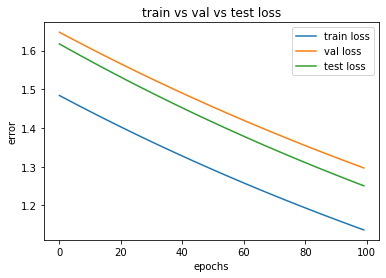

In [9]:
x_axis = [i for i in range(len(lh_train))]
plt.plot(x_axis,lh_train)
plt.plot(x_axis,lh_val)
plt.plot(x_axis,lh_test)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('train vs val vs test loss')
plt.legend(['train loss',"val loss" , "test loss"])
plt.show()

In [10]:
print('best parameters:',parameters )
print('train loss at these parameters:', lh_train[-1])
print('val loss at these parameters:' ,lh_val[-1])
print('test loss at these parameters:', lh_test[-1])

best parameters: [[0.73086188]
 [0.21111414]
 [0.7235088 ]
 [0.4507676 ]
 [0.8956607 ]]
train loss at these parameters: 1.1368801435118203
val loss at these parameters: 1.2968418804391089
test loss at these parameters: 1.2507844085057784


In [11]:
print('test loss is:',lh_test[-1])

test loss is: 1.2507844085057784


### Without Normalization

In [12]:
x = train_unnormalized_x
y = train_unnormalized_y
val_x = val_unnormalized_x
val_y = val_unnormalized_y
test_x = test_unnormalized_x
test_y = test_unnormalized_y
parameters = np.array([np.random.rand() for i in range(5)]).reshape(5,1)# consider first variabel as c
learning_rate = 0.0000000001
epochs = 100
parameters, lh_train, lh_val, lh_test = grad_descent(learning_rate, epochs, parameters)

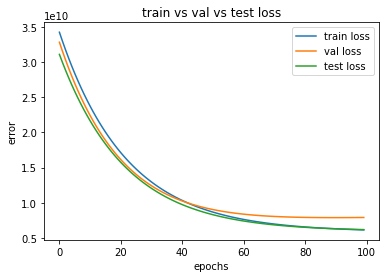

In [13]:
x_axis = [i for i in range(len(lh_train))]
plt.plot(x_axis,lh_train)
plt.plot(x_axis,lh_val)
plt.plot(x_axis,lh_test)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('train vs val vs test loss')
plt.legend(['train loss',"val loss" , "test loss"])
plt.show()

In [14]:
print('best parameters:',parameters )
print('train loss at these parameters:', lh_train[-1])
print('val loss at these parameters:' ,lh_val[-1])
print('test loss at these parameters:', lh_test[-1])

best parameters: [[ 0.15764861]
 [14.36465613]
 [ 0.66627236]
 [ 0.50487668]
 [ 3.6812367 ]]
train loss at these parameters: 6137359655.741345
val loss at these parameters: 7905333048.011866
test loss at these parameters: 6181032038.335693


In [16]:
print('test loss is:',lh_test[-1])

test loss is: 6181032038.335693
